In [2]:
! pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=158462 sha256=c4591e4f7da77478a7820b887f2ed7a34ac581423ada4f12f9c210755fd3f391
  Stored in directory: /Users/lindseynorberg/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud
You should consider upgrading via the '/Applications/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
cupid = pd.read_csv('okcupid_profiles.csv')
cupid.dtypes

age              int64
status          object
sex             object
orientation     object
body_type       object
diet            object
drinks          object
drugs           object
education       object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
pets            object
religion        object
sign            object
smokes          object
speaks          object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
dtype: object

In [4]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [5]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
cupid['essay3'] = cupid['essay3'].apply(lambda text: cleaning_stopwords(text))
cupid['essay5'] = cupid['essay5'].apply(lambda text: cleaning_stopwords(text))

In [6]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
cupid['essay3']= cupid['essay3'].apply(lambda x: cleaning_punctuations(x))
cupid['essay5']= cupid['essay5'].apply(lambda x: cleaning_punctuations(x))

In [7]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
cupid['essay3'] = cupid['essay3'].apply(lambda x: cleaning_repeating_char(x))
cupid['essay5'] = cupid['essay5'].apply(lambda x: cleaning_repeating_char(x))

In [8]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
cupid['essay3'] = cupid['essay3'].apply(lambda x: cleaning_numbers(x))
cupid['essay5'] = cupid['essay5'].apply(lambda x: cleaning_numbers(x))

In [9]:
import nltk
nltk.download('wordnet')
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
cupid['essay3'] = cupid['essay3'].apply(lambda x: lemmatizer_on_text(x))
cupid['essay5'] = cupid['essay5'].apply(lambda x: lemmatizer_on_text(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lindseynorberg/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
X=cupid.essay3
y=cupid.sex

X2 = cupid.essay5

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y,test_size = 0.05, random_state =26105111)

In [11]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
vectoriser.fit(X2_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  363998


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [12]:
def model_Evaluate(model):
# Predict values for Test dataset
    y_pred = model.predict(X_test)
# Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
# Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [13]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

X2_train = vectoriser.transform(X2_train)
X2_test = vectoriser.transform(X2_test)

              precision    recall  f1-score   support

           f       0.86      0.03      0.05      1189
           m       0.61      1.00      0.76      1809

    accuracy                           0.61      2998
   macro avg       0.73      0.51      0.40      2998
weighted avg       0.71      0.61      0.48      2998



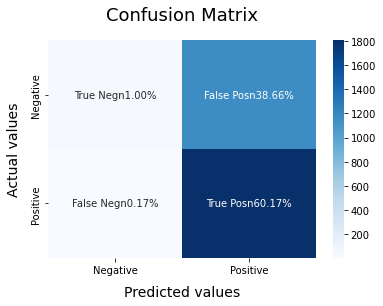

In [14]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

Object `BournoulliNB()` not found.


              precision    recall  f1-score   support

           f       0.55      0.01      0.02      1189
           m       0.60      0.99      0.75      1809

    accuracy                           0.60      2998
   macro avg       0.57      0.50      0.39      2998
weighted avg       0.58      0.60      0.46      2998



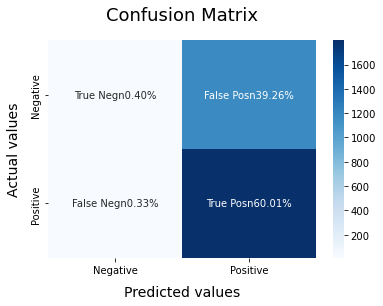

In [49]:
BNBmodel2 = BernoulliNB()
BNBmodel2.fit(X2_train, y2_train)
model_Evaluate(BNBmodel2)
y2_pred1 = BNBmodel2.predict(X2_test)

              precision    recall  f1-score   support

           f       0.58      0.44      0.50      1189
           m       0.68      0.79      0.73      1809

    accuracy                           0.65      2998
   macro avg       0.63      0.62      0.62      2998
weighted avg       0.64      0.65      0.64      2998



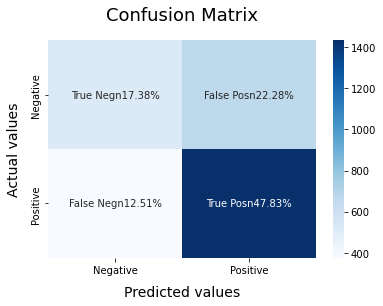

In [35]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

              precision    recall  f1-score   support

           f       0.50      0.19      0.27      1189
           m       0.62      0.88      0.73      1809

    accuracy                           0.60      2998
   macro avg       0.56      0.53      0.50      2998
weighted avg       0.57      0.60      0.55      2998



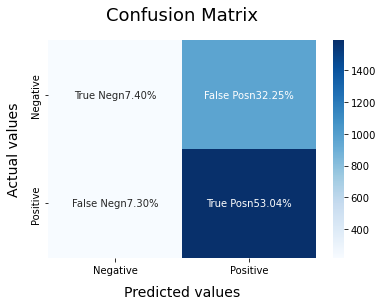

In [16]:
SVCmodel2 = LinearSVC()
SVCmodel2.fit(X2_train, y2_train)
model_Evaluate(SVCmodel2)
y2_pred2 = SVCmodel2.predict(X2_test)

              precision    recall  f1-score   support

           f       0.61      0.37      0.46      1189
           m       0.67      0.84      0.75      1809

    accuracy                           0.66      2998
   macro avg       0.64      0.61      0.60      2998
weighted avg       0.65      0.66      0.63      2998



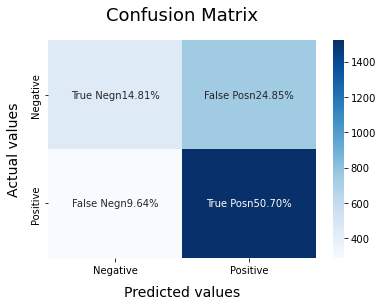

In [17]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

              precision    recall  f1-score   support

           f       0.55      0.16      0.24      1189
           m       0.62      0.92      0.74      1809

    accuracy                           0.62      2998
   macro avg       0.59      0.54      0.49      2998
weighted avg       0.59      0.62      0.54      2998



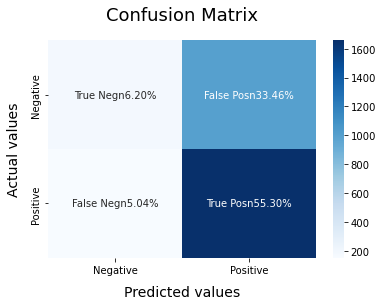

In [18]:
LRmodel2 = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel2.fit(X2_train, y2_train)
model_Evaluate(LRmodel2)
y2_pred3 = LRmodel2.predict(X2_test)